#Lab Week 13
Please run the following code blocks one by one.

In [2]:
# get the music-genre-classification dataset
!git clone https://github.com/sergiooramas/music-genre-classification

Cloning into 'music-genre-classification'...
remote: Enumerating objects: 43, done.
remote: Total 43 (delta 0), reused 0 (delta 0), pack-reused 43
Unpacking objects: 100% (43/43), done.


In [59]:
# prepare the glove embeddings for the tutorial
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Before Lab and Assignment, make sure you've put the embedding lookup tables into `/content/gdrive/My Drive/music_data_mining/`.

- open the following urls
  - archive_glove.6B.50d.zip https://drive.google.com/file/d/1JfFF9o6Cmv2ek6r5FbKgOkMro8EykVlD/view?usp=share_link
  - archive_glove.6B.100d.zip https://drive.google.com/file/d/1VbXUDBlJ9106GBKisF9R-PivTSOnWEzZ/view?usp=share_link
- click the triangle with a plus ("Add shorcut to Drive") on the upper right corner
- navigate to the directory `/content/gdrive/My Drive/music_data_mining/` and confirm by clicking "Add shortcut here".

In [3]:
import numpy as np
from tensorflow import keras
import json

from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import Tokenizer

import pandas as pd
import matplotlib.pyplot as plt

# Load and process the dataset

In [4]:
# load the dataset
products = json.load(open("music-genre-classification/dataset_classification.json","r"))

In [5]:
# products is a dict of dicts
# a typical entry is shown below
products['B009XIFF5K']

{'char_length': 291,
 'all_text_pos': 'This_DT guy_NN is_VBZ a_DT genius_NN his_PRP$ arrangements posarrangements_NNS is_VBZ splendid_JJ I_PRP start_VB my_PRP$ day_NN with_IN his_PRP$ album_NN and_CC end posend_NN it_PRP with_IN samealways_NNS take_VB me_PRP to_TO a_DT calm_JJ and_CC comfortable_JJ place posplace_NN I_PRP love_NN mbandi posmbandi_NN .\nThis_DT cd_NN is_VBZ wonderful_JJ I_PRP purchased_VBN it_PRP about_IN 3_CD weeks_NNS ago_RB and_CC cannot_MD stop_VB listening_VBG to_TO it_PRP Mbandi_NNP is_VBZ such_JJ a_DT talented_JJ musician posmusician_NN ',
 'all_lemmas': 'this guy is a genius his arrangements posarrangement is splendid i start my day with his album and end posend it with samealways take me to a calm and comfortable place posplace i love mbandi posmbandi .\nthis cd is wonderful i purchased it about 3 week ago and cannot stop listening to it mbandi is such a talented musician posmusician ',
 'all_text_sentiment': 'This guy is a genius his arrangements posarrangemen

In [6]:
# extract reviews (data) and genre (labels)
reviews = []
labels_dict = {'Alternative Rock':0,'Classical':1,'Country':2,'Dance & Electronic':3,'Folk':4,'Jazz':5,'Latin Music':6,
               'Metal':7,'New Age':8,'Pop':9,'R&B':10,'Rap & Hip-Hop':11,'Rock':12}
labels = []

for values in products.values():
  for i in range(values['num_reviews']):
    reviews.append(values['reviews'][i]['text'])
    labels.append(labels_dict[values['genre']])

# what does a genre-review pair look like
print(labels[0],': ', reviews[0])

8 :  This guy is a genius! His arrangements is splendid. I start my day with his album and end it with samealways take me to a calm and comfortable place. I love MBandi !


In [7]:
t = Tokenizer() # Instantiate the Tokenizer
t.fit_on_texts(reviews) # fit the Tokenizer on the reviews

labels = np.asarray(labels)

print(t.word_counts['the']) # The frequency of 'the': 18,265
print(t.word_counts['rap']) # The frequency of 'rap': 115
print(t.word_counts['alternative']) # The frequency of 'alternative': 18
print(t.document_count) # the number of reviews: 3116
print(t.word_index) # A dictionary of words and their uniquely assigned integers
print(t.word_docs) # Document frequency
print(len(t.word_index)) # the number of unique words in the corpus: 25,713

18265
115
18
3116
{'the': 1, 'and': 2, 'of': 3, 'a': 4, 'to': 5, 'is': 6, 'i': 7, 'this': 8, 'it': 9, 'in': 10, 'that': 11, 'on': 12, 'you': 13, 'with': 14, 'for': 15, 'album': 16, 'are': 17, 'as': 18, 'but': 19, 'music': 20, 'was': 21, 'cd': 22, 'have': 23, 'one': 24, 'quot': 25, 'my': 26, 'not': 27, 'from': 28, 'all': 29, 'like': 30, 'be': 31, 'songs': 32, 'if': 33, 'his': 34, 'by': 35, 'song': 36, 'great': 37, 'an': 38, 'so': 39, 'more': 40, 'just': 41, 'has': 42, 'they': 43, 'at': 44, 'me': 45, 'or': 46, "it's": 47, 'out': 48, 'their': 49, 'love': 50, 'some': 51, 'very': 52, 'her': 53, 'good': 54, 'he': 55, 'first': 56, 'there': 57, 'best': 58, 'time': 59, 'when': 60, 'can': 61, 'will': 62, 'sound': 63, 'which': 64, 'up': 65, 'what': 66, 'well': 67, 'other': 68, 'only': 69, 'your': 70, 'most': 71, 'would': 72, 'these': 73, 'no': 74, 'had': 75, 'really': 76, 'get': 77, 'about': 78, 'also': 79, 'than': 80, 'tracks': 81, 'who': 82, 'new': 83, 'track': 84, 'here': 85, 'much': 86, 'been

In [47]:
encoded_docs_bow = t.texts_to_matrix(reviews, mode='freq') # Normalized TF
encoded_docs_tfidf = t.texts_to_matrix(reviews, mode='tfidf') # TF-IDF

seq_docs = t.texts_to_sequences(reviews) # Transform each review in reviews in a sequence of integers
seq_docs_padded=keras.preprocessing.sequence.pad_sequences(seq_docs, maxlen=None, dtype='int32', padding='post', truncating='post', value=0) # Pads sequences to the same length

print(encoded_docs_bow.shape, encoded_docs_tfidf.shape) #(3116, 25714)
print(t.index_word[10]) # in
print(encoded_docs_bow[10,10]) # 0.01818181818181818
print(encoded_docs_tfidf[10,10]) # 0.9617162219143193

print(reviews[0])
print(seq_docs[0])

print(seq_docs_padded.shape) # (3116, 3232)
print(seq_docs_padded[0])    # [  8 616   6 ...   0   0   0]

(3116, 25714) (3116, 25714)
in
0.01818181818181818
0.9617162219143193
This guy is a genius! His arrangements is splendid. I start my day with his album and end it with samealways take me to a calm and comfortable place. I love MBandi !
[8, 616, 6, 4, 749, 34, 529, 6, 2421, 7, 448, 26, 243, 14, 34, 16, 2, 283, 9, 14, 12131, 220, 45, 5, 4, 1856, 2, 2981, 468, 7, 50, 8361]
(3116, 3232)
[  8 616   6 ...   0   0   0]


# Model #1. 
- Input: TF
- Algorithm: DNN

In [15]:
model = keras.models.Sequential([
  keras.layers.Dense(units=200, activation='elu', input_shape=(len(t.word_index)+1, )),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(units=200, activation='elu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(units=13, activation='softmax'),
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

history = model.fit(encoded_docs_bow, labels, batch_size=1000, epochs=200, validation_split=.1,
                    callbacks=[keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)])

Epoch 1/200
3/3 [==============================] - 1s 184ms/step - loss: 2.5635 - accuracy: 0.0934 - val_loss: 2.5566 - val_accuracy: 0.1571
Epoch 2/200
3/3 [==============================] - 0s 85ms/step - loss: 2.5559 - accuracy: 0.1166 - val_loss: 2.5469 - val_accuracy: 0.1571
Epoch 3/200
3/3 [==============================] - 0s 82ms/step - loss: 2.5485 - accuracy: 0.1163 - val_loss: 2.5373 - val_accuracy: 0.1571
Epoch 4/200
3/3 [==============================] - 0s 88ms/step - loss: 2.5429 - accuracy: 0.1163 - val_loss: 2.5289 - val_accuracy: 0.1571
Epoch 5/200
3/3 [==============================] - 0s 82ms/step - loss: 2.5365 - accuracy: 0.1163 - val_loss: 2.5226 - val_accuracy: 0.1571
Epoch 6/200
3/3 [==============================] - 0s 85ms/step - loss: 2.5292 - accuracy: 0.1163 - val_loss: 2.5183 - val_accuracy: 0.1571
Epoch 7/200
3/3 [==============================] - 0s 83ms/step - loss: 2.5238 - accuracy: 0.1163 - val_loss: 2.5149 - val_accuracy: 0.1571
Epoch 8/200
3/3 [==

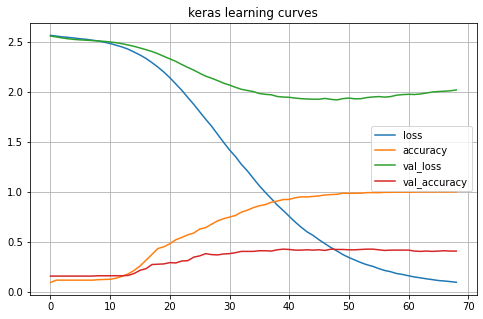

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

plt.title("keras learning curves")
plt.show()

# Model #2. 
- Input: TF-IDF
- Algorithm: DNN

In [17]:
model = keras.models.Sequential([
  # keras.layers.Dropout(0.5),
  keras.layers.Dense(units=200, activation='elu', input_shape=(len(t.word_index)+1, )),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(units=200, activation='elu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(units=13, activation='softmax'),
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

history = model.fit(encoded_docs_tfidf, labels, batch_size=1000, epochs=200, validation_split=.1,
                    callbacks=[keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)])
      #  

Epoch 1/200
3/3 [==============================] - 1s 182ms/step - loss: 2.6490 - accuracy: 0.1120 - val_loss: 2.3657 - val_accuracy: 0.2276
Epoch 2/200
3/3 [==============================] - 0s 83ms/step - loss: 1.7953 - accuracy: 0.4914 - val_loss: 2.1570 - val_accuracy: 0.3686
Epoch 3/200
3/3 [==============================] - 0s 85ms/step - loss: 1.2127 - accuracy: 0.7386 - val_loss: 2.0190 - val_accuracy: 0.3942
Epoch 4/200
3/3 [==============================] - 0s 88ms/step - loss: 0.7999 - accuracy: 0.8623 - val_loss: 1.9233 - val_accuracy: 0.4038
Epoch 5/200
3/3 [==============================] - 0s 84ms/step - loss: 0.4957 - accuracy: 0.9312 - val_loss: 1.8548 - val_accuracy: 0.4327
Epoch 6/200
3/3 [==============================] - 0s 82ms/step - loss: 0.3041 - accuracy: 0.9643 - val_loss: 1.8201 - val_accuracy: 0.4487
Epoch 7/200
3/3 [==============================] - 0s 77ms/step - loss: 0.1809 - accuracy: 0.9840 - val_loss: 1.8222 - val_accuracy: 0.4744
Epoch 8/200
3/3 [==

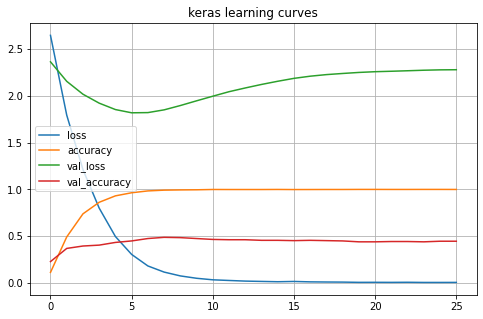

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

plt.title("keras learning curves")
plt.show()

# Model #3. 
- Input: Sequence, self-embedding
- Algorithm: LSTM

In [52]:
# reference of the arguments: https://tensorflow.google.cn/api_docs/python/tf/keras/utils/pad_sequences
seq_docs_padded=keras.preprocessing.sequence.pad_sequences(seq_docs, maxlen=1000, dtype='int32', padding='post', truncating='post', value=0)
print(seq_docs_padded.shape)

(3116, 1000)


In [32]:
model = keras.models.Sequential([
    keras.layers.Embedding(len(t.word_index)+1, 100, input_length=1000, mask_zero=True),
    keras.layers.LSTM(100, dropout=.5, return_sequences=True),
    keras.layers.LayerNormalization(),
    keras.layers.LSTM(100, dropout=.2, return_sequences=False),
    keras.layers.LayerNormalization(),
    keras.layers.Dropout(.2),
    keras.layers.Dense(units=13, activation='softmax')
])


model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=0.001, clipvalue=0.01),
              metrics=["accuracy"])

history = model.fit(seq_docs_padded, labels, batch_size=500, epochs=200, validation_split=.1,
                    callbacks=[keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)])

Epoch 1/200
6/6 [==============================] - 13s 942ms/step - loss: 3.2192 - accuracy: 0.0777 - val_loss: 2.6690 - val_accuracy: 0.0994
Epoch 2/200
6/6 [==============================] - 3s 492ms/step - loss: 2.6892 - accuracy: 0.1184 - val_loss: 2.5474 - val_accuracy: 0.1763
Epoch 3/200
6/6 [==============================] - 3s 484ms/step - loss: 2.5485 - accuracy: 0.1480 - val_loss: 2.5291 - val_accuracy: 0.1603
Epoch 4/200
6/6 [==============================] - 3s 486ms/step - loss: 2.3714 - accuracy: 0.2101 - val_loss: 2.5630 - val_accuracy: 0.1571
Epoch 5/200
6/6 [==============================] - 4s 531ms/step - loss: 2.1480 - accuracy: 0.2864 - val_loss: 2.6638 - val_accuracy: 0.1795
Epoch 6/200
6/6 [==============================] - 3s 486ms/step - loss: 1.8930 - accuracy: 0.3784 - val_loss: 2.6435 - val_accuracy: 0.1891
Epoch 7/200
6/6 [==============================] - 3s 484ms/step - loss: 1.6076 - accuracy: 0.4836 - val_loss: 2.7347 - val_accuracy: 0.2244
Epoch 8/200


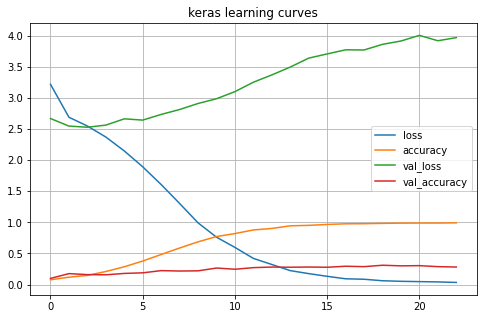

In [33]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

plt.title("keras learning curves")
plt.show()

# Model #4. 
- Input: Sequence, GloVe 50
- Algorithm: LSTM

In [61]:
# unzip the embedding file
!unzip '/content/gdrive/My Drive/music_data_mining/archive_glove.6B.50d.zip'

Archive:  /content/gdrive/My Drive/music_data_mining/archive_glove.6B.50d.zip
  inflating: glove.6B.50d.txt        


In [62]:
# load GloVe 50-dim
glove50_embeddings_index = dict()
f = open('glove.6B.50d.txt')
for line in f:
	glove50_values = line.split()
	glove50_word = glove50_values[0]
	glove50_coefs = np.asarray(glove50_values[1:], dtype='float32')
	glove50_embeddings_index[glove50_word] = glove50_coefs
f.close()
print('Loaded %s word vectors.' % len(glove50_embeddings_index))

# create a weight matrix for words in training docs
glove50_embedding_matrix = np.zeros((len(t.word_index)+1, 50))
for word, i in t.word_index.items():
  glove50_embedding_vector = glove50_embeddings_index.get(word)
  if glove50_embedding_vector is not None:
    glove50_embedding_matrix[i] = glove50_embedding_vector


Loaded 400000 word vectors.


In [55]:
model = keras.models.Sequential([
    keras.layers.Embedding(len(t.word_index)+1, 50, weights=[glove50_embedding_matrix], input_length=1000, trainable=False, mask_zero=True),                            
    keras.layers.LSTM(100, dropout=.5, return_sequences=False),
    keras.layers.Dropout(.2),
    keras.layers.Dense(units=13, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=0.001, clipvalue=0.01),
              metrics=["accuracy"])

history = model.fit(seq_docs_padded, labels, batch_size=100, epochs=200, validation_split=.1,
                    callbacks=[keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)])

Epoch 1/200
29/29 [==============================] - 9s 92ms/step - loss: 2.5655 - accuracy: 0.1120 - val_loss: 2.4957 - val_accuracy: 0.1635
Epoch 2/200
29/29 [==============================] - 1s 45ms/step - loss: 2.5085 - accuracy: 0.1323 - val_loss: 2.4741 - val_accuracy: 0.1891
Epoch 3/200
29/29 [==============================] - 1s 47ms/step - loss: 2.4512 - accuracy: 0.1641 - val_loss: 2.4619 - val_accuracy: 0.1731
Epoch 4/200
29/29 [==============================] - 1s 46ms/step - loss: 2.3621 - accuracy: 0.1986 - val_loss: 2.3950 - val_accuracy: 0.2115
Epoch 5/200
29/29 [==============================] - 1s 45ms/step - loss: 2.2920 - accuracy: 0.2300 - val_loss: 2.3670 - val_accuracy: 0.2212
Epoch 6/200
29/29 [==============================] - 1s 47ms/step - loss: 2.2672 - accuracy: 0.2429 - val_loss: 2.3521 - val_accuracy: 0.2115
Epoch 7/200
29/29 [==============================] - 1s 43ms/step - loss: 2.2145 - accuracy: 0.2657 - val_loss: 2.3406 - val_accuracy: 0.2179
Epoch 

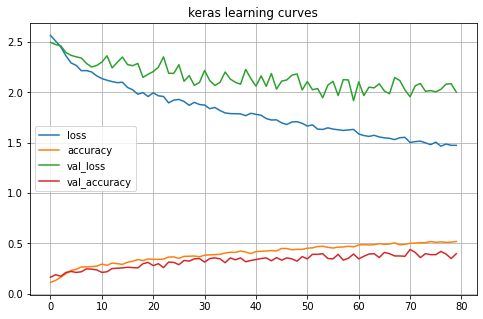

In [56]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

plt.title("keras learning curves")
plt.show()

# Model #5. 
- Input: Sequence, GloVe 100, trainable=False
- Algorithm: LSTM

In [63]:
# unzip the embedding file
!unzip '/content/gdrive/My Drive/music_data_mining/archive_glove.6B.100d.zip'

Archive:  /content/gdrive/My Drive/music_data_mining/archive_glove.6B.100d.zip
  inflating: glove.6B.100d.txt       


In [64]:
# GloVe 100-dim
glove100_embeddings_index = dict()
f = open('glove.6B.100d.txt')
for line in f:
	glove100_values = line.split()
	glove100_word = glove100_values[0]
	glove100_coefs = np.asarray(glove100_values[1:], dtype='float32')
	glove100_embeddings_index[glove100_word] = glove100_coefs
f.close()
print('Loaded %s word vectors.' % len(glove100_embeddings_index))

# create a weight matrix for words in training docs
glove100_embedding_matrix = np.zeros((len(t.word_index)+1, 100))
for word, i in t.word_index.items():
  glove100_embedding_vector = glove100_embeddings_index.get(word)
  if glove100_embedding_vector is not None:
    glove100_embedding_matrix[i] = glove100_embedding_vector

Loaded 400000 word vectors.


In [65]:
model = keras.models.Sequential([
    keras.layers.Embedding(len(t.word_index)+1, 100, weights=[glove100_embedding_matrix], input_length=1000, trainable=False, mask_zero=True),                            
    keras.layers.LSTM(100, dropout=.5, return_sequences=False),
    keras.layers.Dropout(.2),
    keras.layers.Dense(units=13, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=0.001, clipvalue=0.01),
              metrics=["accuracy"])

history = model.fit(seq_docs_padded, labels, batch_size=100, epochs=200, validation_split=.1,
                    callbacks=[keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)])
      #  

Epoch 1/200
29/29 [==============================] - 7s 116ms/step - loss: 2.5638 - accuracy: 0.1159 - val_loss: 2.5469 - val_accuracy: 0.1282
Epoch 2/200
29/29 [==============================] - 2s 53ms/step - loss: 2.5169 - accuracy: 0.1377 - val_loss: 2.4899 - val_accuracy: 0.1923
Epoch 3/200
29/29 [==============================] - 1s 48ms/step - loss: 2.4510 - accuracy: 0.1673 - val_loss: 2.4638 - val_accuracy: 0.1955
Epoch 4/200
29/29 [==============================] - 1s 50ms/step - loss: 2.3985 - accuracy: 0.1830 - val_loss: 2.3771 - val_accuracy: 0.2276
Epoch 5/200
29/29 [==============================] - 1s 48ms/step - loss: 2.3094 - accuracy: 0.2229 - val_loss: 2.3687 - val_accuracy: 0.2051
Epoch 6/200
29/29 [==============================] - 1s 50ms/step - loss: 2.2400 - accuracy: 0.2518 - val_loss: 2.4499 - val_accuracy: 0.2051
Epoch 7/200
29/29 [==============================] - 1s 46ms/step - loss: 2.1844 - accuracy: 0.2700 - val_loss: 2.4249 - val_accuracy: 0.1731
Epoch

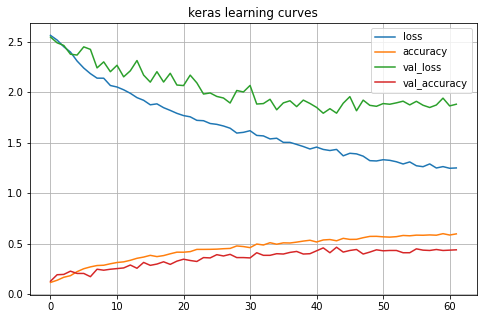

In [66]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

plt.title("keras learning curves")
plt.show()

# Model #6. 
- Input: Sequence, GloVe 100, trainable=True
- Algorithm: LSTM

In [68]:
model = keras.models.Sequential([
    keras.layers.Embedding(len(t.word_index)+1, 100, weights=[glove100_embedding_matrix], input_length=1000, trainable=True, mask_zero=True),                            
    keras.layers.LSTM(100, dropout=.5, return_sequences=False),
    keras.layers.Dropout(.2),
    keras.layers.Dense(units=13, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=0.001, clipvalue=0.01),
              metrics=["accuracy"])

history = model.fit(seq_docs_padded, labels, batch_size=100, epochs=200, validation_split=.1,
                    callbacks=[keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)])

Epoch 1/200
29/29 [==============================] - 9s 119ms/step - loss: 2.5650 - accuracy: 0.1073 - val_loss: 2.5063 - val_accuracy: 0.1667
Epoch 2/200
29/29 [==============================] - 2s 55ms/step - loss: 2.5124 - accuracy: 0.1394 - val_loss: 2.4813 - val_accuracy: 0.1763
Epoch 3/200
29/29 [==============================] - 2s 52ms/step - loss: 2.4455 - accuracy: 0.1633 - val_loss: 2.4154 - val_accuracy: 0.2019
Epoch 4/200
29/29 [==============================] - 1s 50ms/step - loss: 2.3197 - accuracy: 0.2197 - val_loss: 2.4867 - val_accuracy: 0.1410
Epoch 5/200
29/29 [==============================] - 2s 56ms/step - loss: 2.2200 - accuracy: 0.2611 - val_loss: 2.2777 - val_accuracy: 0.2179
Epoch 6/200
29/29 [==============================] - 1s 52ms/step - loss: 2.0736 - accuracy: 0.3046 - val_loss: 2.2520 - val_accuracy: 0.2436
Epoch 7/200
29/29 [==============================] - 1s 51ms/step - loss: 1.9530 - accuracy: 0.3459 - val_loss: 2.2264 - val_accuracy: 0.2788
Epoch

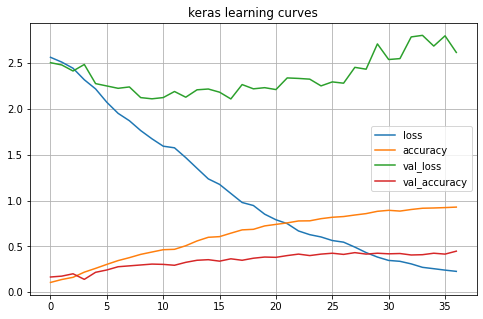

In [69]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

plt.title("keras learning curves")
plt.show()

# Model #7. 
- Input: TF-IDF
- Algorithm: SVM

In [70]:
from sklearn.linear_model import SGDClassifier
import numpy as np
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=0.01,
                        max_iter=100, tol=-np.infty, random_state=42)
sgd_clf.fit(encoded_docs_tfidf, labels)


SGDClassifier(alpha=0.01, eta0=0.001, learning_rate='constant', max_iter=100,
              random_state=42, tol=-inf)

In [71]:
from sklearn.metrics import accuracy_score
y_pred = sgd_clf.predict(encoded_docs_tfidf)
accuracy_score(labels, y_pred)

1.0

In [72]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(encoded_docs_tfidf, labels, test_size=0.1, random_state=42)

In [73]:
from sklearn.linear_model import SGDClassifier
import numpy as np
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=0.01,
                        max_iter=100, tol=-np.infty, random_state=42)
sgd_clf.fit(a_train, b_train)

from sklearn.metrics import accuracy_score
y_pred = sgd_clf.predict(a_test)
accuracy_score(b_test, y_pred)

0.5352564102564102